In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def rsi_factor(df, period=20):
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [5]:
evaluator.set_factor(
    factor_data_or_func=rsi_factor,
    factor_name='rsi_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.012700
   Rank_IC (Spearman): -0.033660
📊 信息比率:
   IR: 0.544968
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130729
   因子列: rsi_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


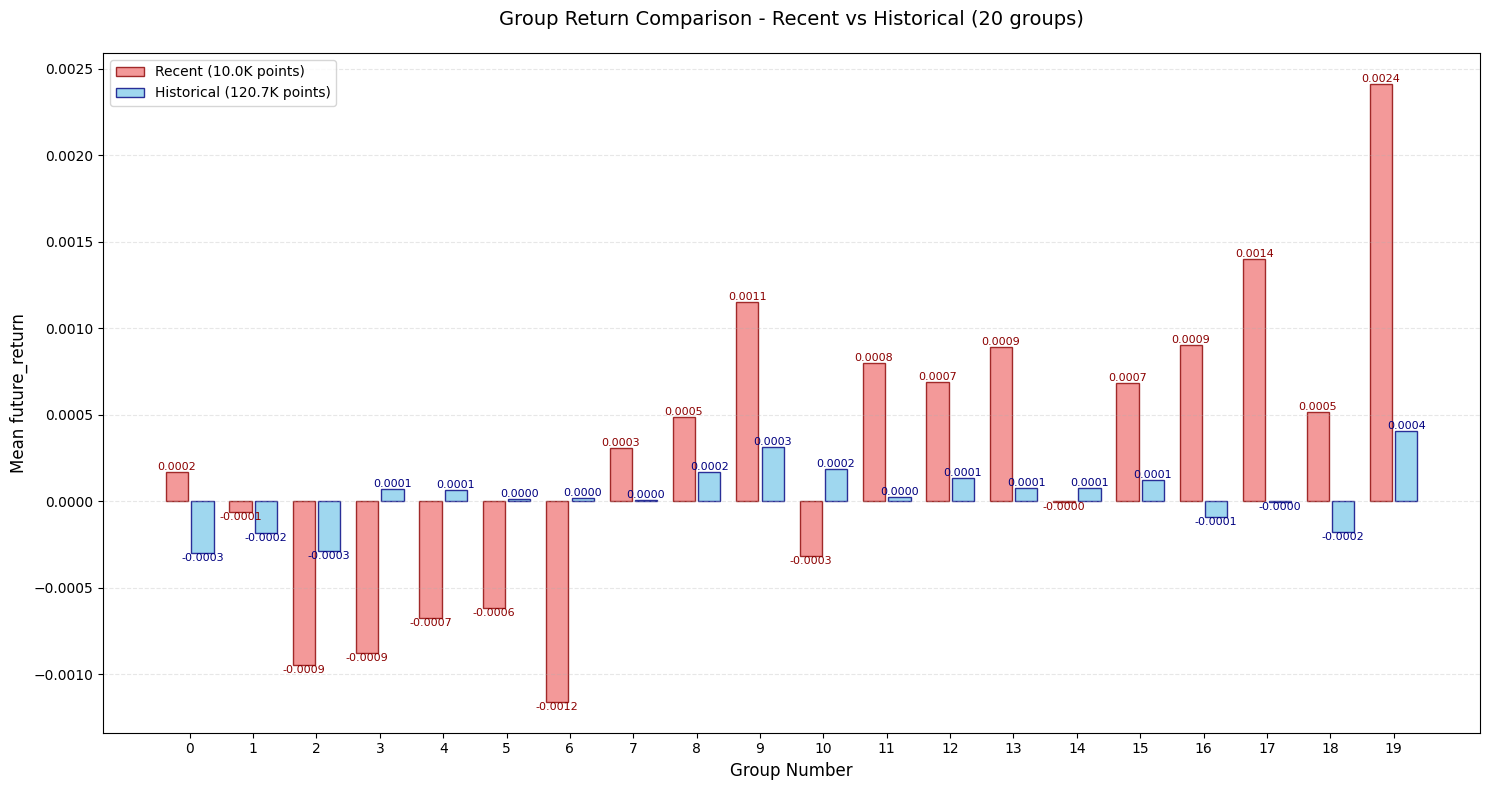

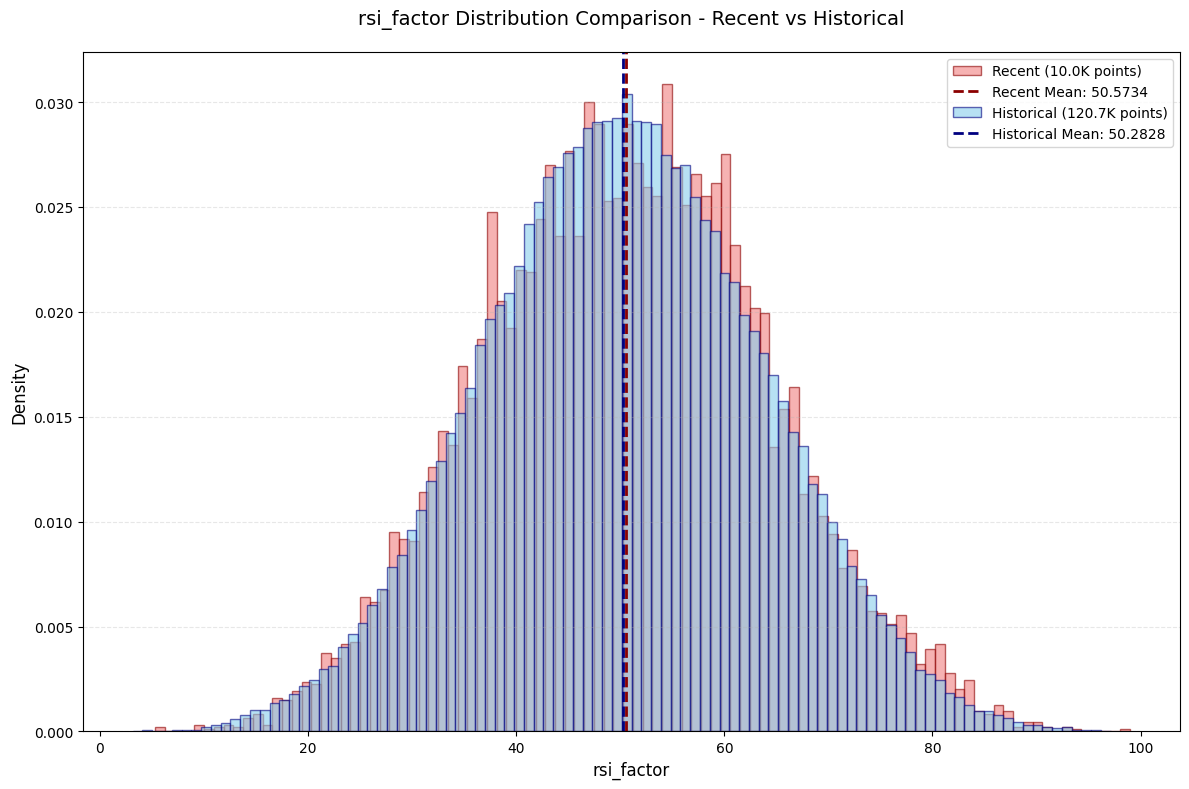

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)

In [7]:
import matplotlib.pyplot as plt
sig=improved_factor(df)

NameError: name 'improved_factor' is not defined

In [ ]:
plt.scatter(sig, df['close'].pct_change(-10),s=0.1)